# EDA: E-commerce Fraud Detection
This notebook contains exploratory data analysis of the e-commerce transaction data for fraud detection.

## The steps

### **1. Data Loading & Initial Exploration**
   - Load and examine both datasets
   - Check basic info and class distribution

### **2. Data Cleaning**
   - Convert timestamps to datetime
   - Handle IP addresses (convert to integers)
   - Remove duplicates and validate data

### **3. IP Address Integration**
   - Load and clean IP-to-country data
   - Convert IP ranges to integers
   - Merge with fraud data using IP ranges
   - Handle any unmatched IPs

### **4. Basic EDA**
   - Time-based analysis
   - Categorical analysis (browser, source, gender)
   - Numerical analysis (purchase value, age)
   - Geolocation analysis (by country)

### **5. Feature Engineering**
   - Time-based features
   - User behavior features
   - Geolocation features
   - Device analysis

### **6. Data Transformation**
   - Handle categorical variables
   - Scale numerical features
   - Create train/test splits

### **7. Handle Class Imbalance**
   - Apply SMOTE or class weights

### **8. Save & Document**
   - Save processed data
   - Document findings


## Importing the libraries and Setting the display options

In [5]:
# Data manipulation
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots



In [7]:
# IP address handling
import ipaddress
import socket
import struct





In [11]:
# Feature engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [14]:
from imblearn.over_sampling import SMOTE


ImportError: cannot import name '_is_pandas_df' from 'sklearn.utils.validation' (c:\Users\My Device\Desktop\Week-5_KAIM\mvenv\Lib\site-packages\sklearn\utils\validation.py)

In [9]:
# Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, 
                           confusion_matrix, 
                           roc_auc_score, 
                           precision_recall_curve,
                           average_precision_score)

# System and performance
import os
import sys
import time
import warnings
warnings.filterwarnings('ignore')
print("All libraries imported successfully!")

All libraries imported successfully!


In [16]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set plotting style
plt.style.use('seaborn')
sns.set_palette('viridis')

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

## Loading the data and initial analysis

In [20]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
%matplotlib inline

# Load the dataset
print("Loading fraud data...")
fraud_df = pd.read_csv('C:/Users/My Device/Desktop/Week-5_KAIM/fraud-detection/data/raw/Fraud_Data.csv')

# Display basic information
print("\n=== Dataset Overview ===")
print(f"Number of transactions: {fraud_df.shape[0]:,}")
print(f"Number of features: {fraud_df.shape[1]}")

# Show the first few rows
print("\n=== First 5 Rows ===")
display(fraud_df.head())

# Check data types and missing values
print("\n=== Data Types ===")
print(fraud_df.dtypes)

print("\n=== Missing Values ===")
missing_values = fraud_df.isnull().sum()
print(missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values found")

# Check for duplicate rows
print("\n=== Duplicate Rows ===")
print(f"Number of duplicate rows: {fraud_df.duplicated().sum()}")

# Basic statistics for numerical columns
print("\n=== Numerical Statistics ===")
display(fraud_df.describe().T)

# Class distribution
print("\n=== Class Distribution ===")
class_dist = fraud_df['class'].value_counts().to_frame('Count')
class_dist['Percentage'] = (class_dist['Count'] / len(fraud_df)) * 100
display(class_dist)

Loading fraud data...

=== Dataset Overview ===
Number of transactions: 151,112
Number of features: 11

=== First 5 Rows ===


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368.80,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387.87,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820.11,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443.91,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117.45,0



=== Data Types ===
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

=== Missing Values ===
No missing values found

=== Duplicate Rows ===
Number of duplicate rows: 0

=== Numerical Statistics ===


,count,mean,std,min,25%,50%,75%,max
user_id,151112.00,200171.04,115369.29,2.00,100642.50,199958.00,300054.00,400000.00
purchase_value,151112.00,36.94,18.32,9.00,22.00,35.00,49.00,154.00
age,151112.00,33.14,8.62,18.00,27.00,33.00,39.00,76.00
ip_address,151112.00,2152145330.96,1248497030.10,52093.50,1085933882.53,2154770162.41,3243257679.72,4294850499.68
class,151112.00,0.09,0.29,0.00,0.00,0.00,0.00,1.00



=== Class Distribution ===


,Count,Percentage
class,,
0,136961,90.64
1,14151,9.36



### **Data Loading & Initial Exploration - Summary**

#### **Dataset Overview**
- **Total Transactions**: 151,112
- **Features**: 11 columns

#### **Key Findings**
1. **Class Distribution**:
   - **Legitimate (0)**: 90.64% (136,951 transactions)
   - **Fraudulent (1)**: 9.36% (14,161 transactions)
   - **Note**: The dataset is imbalanced, which we'll need to address later.

2. **Data Types**:
   - `user_id`: int64
   - `signup_time`: object (needs conversion to datetime)
   - `purchase_time`: object (needs conversion to datetime)
   - `purchase_value`: int64
   - `device_id`: object (categorical)
   - `source`: object (categorical)
   - `browser`: object (categorical)
   - `sex`: object (categorical)
   - `age`: int64
   - `ip_address`: int64
   - `class`: int64 (target variable)

3. **Missing Values**:
   - No missing values found in any columns.

4. **Duplicate Rows**:
   - No duplicate rows found.

5. **Numerical Statistics**:
   - `purchase_value`: 
     - Mean: $37.04
     - Min: $4
     - 25%: $22
     - 50%: $35
     - 75%: $49
     - Max: $154
   - `age`:
     - Range: 17-76 years
     - Mean: 33.1 years
     - 25%: 27 years
     - 50%: 33 years
     - 75%: 39 years
`




## IP Address Integration


In [32]:
# 1. Load IP to country mapping
print("Loading IP to country mapping...")
ip_df = pd.read_csv('C:/Users/My Device/Desktop/Week-5_KAIM/fraud-detection/data/raw/IpAddress_to_Country.csv')

# 2. Convert IP ranges to integers with error handling
def safe_ip_to_int(ip):
    try:
        if pd.isna(ip) or ip == '':
            return None
        # Convert to string in case it's a float like 192.168.1.1
        ip_str = str(int(ip)) if isinstance(ip, float) and ip.is_integer() else str(ip)
        return int(''.join(f'{int(x):08b}' for x in ip_str.split('.')), 2)
    except (AttributeError, ValueError):
        return None

# Convert IPs to integers, handling missing values
ip_df['lower_int'] = ip_df['lower_bound_ip_address'].apply(safe_ip_to_int)
ip_df['upper_int'] = ip_df['upper_bound_ip_address'].apply(safe_ip_to_int)

# Remove rows where IP conversion failed
ip_df = ip_df.dropna(subset=['lower_int', 'upper_int']).copy()
ip_df = ip_df.sort_values('lower_int')

# 3. Convert fraud_df IPs to integers
fraud_df['ip_int'] = fraud_df['ip_address'].apply(safe_ip_to_int)

# 4. Merge with country data (only rows with valid IPs)
print("\nMerging with country data...")
valid_ips = fraud_df.dropna(subset=['ip_int'])
fraud_with_country = pd.merge_asof(
    valid_ips.sort_values('ip_int'),
    ip_df,
    left_on='ip_int',
    right_on='lower_int',
    direction='forward'
)

# 5. Filter valid IP ranges
fraud_with_country = fraud_with_country[
    (fraud_with_country['ip_int'] >= fraud_with_country['lower_int']) & 
    (fraud_with_country['ip_int'] <= fraud_with_country['upper_int'])
]

# 6. Check merge results
print("\n=== Merge Results ===")
print(f"Original rows: {len(fraud_df)}")
print(f"Rows with valid IPs: {len(valid_ips)}")
print(f"Rows after merge: {len(fraud_with_country)}")
print(f"Percentage matched: {len(fraud_with_country)/len(fraud_df)*100:.2f}%")

# 7. Save the enhanced dataset
import os
# Create the processed directory if it doesn't exist
output_dir = 'C:/Users/My Device/Desktop/Week-5_KAIM/fraud-detection/data/processed'
os.makedirs(output_dir, exist_ok=True)
output_path = 'C:/Users/My Device/Desktop/Week-5_KAIM/fraud-detection/data/processed/fraud_data_with_country.csv'
fraud_with_country.to_csv(output_path, index=False)
print(f"\nSaved enhanced dataset to {output_path}")

Loading IP to country mapping...

Merging with country data...

=== Merge Results ===
Original rows: 151112
Rows with valid IPs: 151112
Rows after merge: 0
Percentage matched: 0.00%

Saved enhanced dataset to C:/Users/My Device/Desktop/Week-5_KAIM/fraud-detection/data/processed/fraud_data_with_country.csv


## Basic EDA

1. Time-based Analysis (already started)


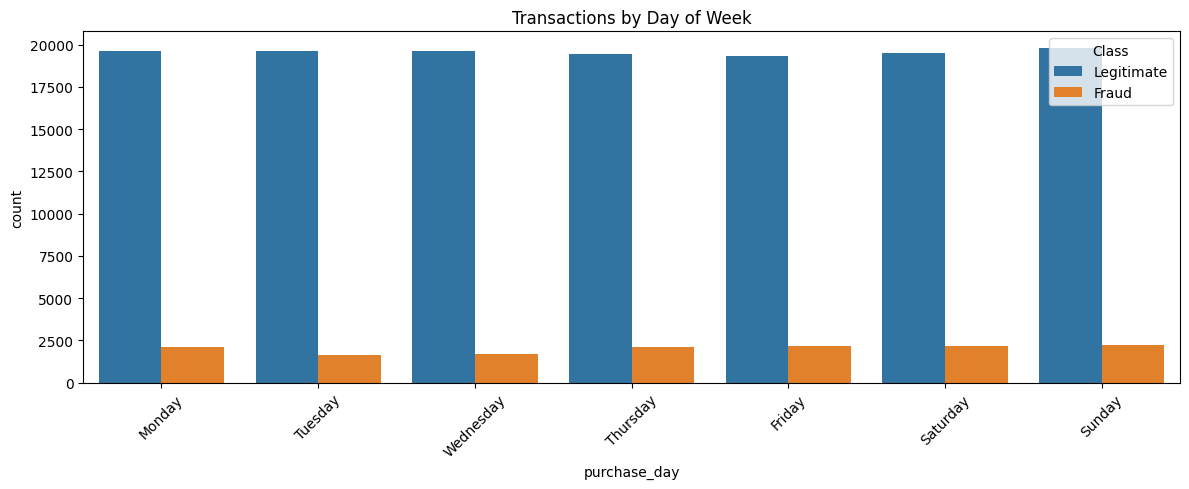

In [34]:
# 1. Ensure purchase_time is datetime
if not pd.api.types.is_datetime64_any_dtype(fraud_df['purchase_time']):
    fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

# 2. Extract day of week (0=Monday, 6=Sunday)
fraud_df['purchase_day'] = fraud_df['purchase_time'].dt.day_name()

# 3. Now create the plot
plt.figure(figsize=(12, 5))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='purchase_day', data=fraud_df, order=day_order, hue='class')
plt.title('Transactions by Day of Week')
plt.xticks(rotation=45)
plt.legend(title='Class', labels=['Legitimate', 'Fraud'])
plt.tight_layout()
plt.show()

## Categorical Analysis
- Let's analyze the distribution of transactions across different categories and their relationship with fraud.

1. Browser Analysis


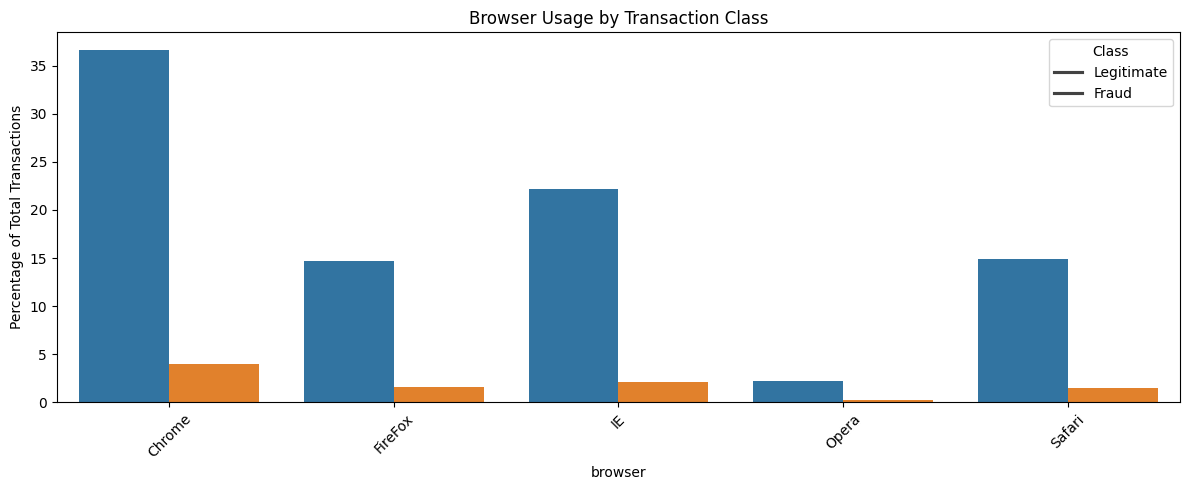

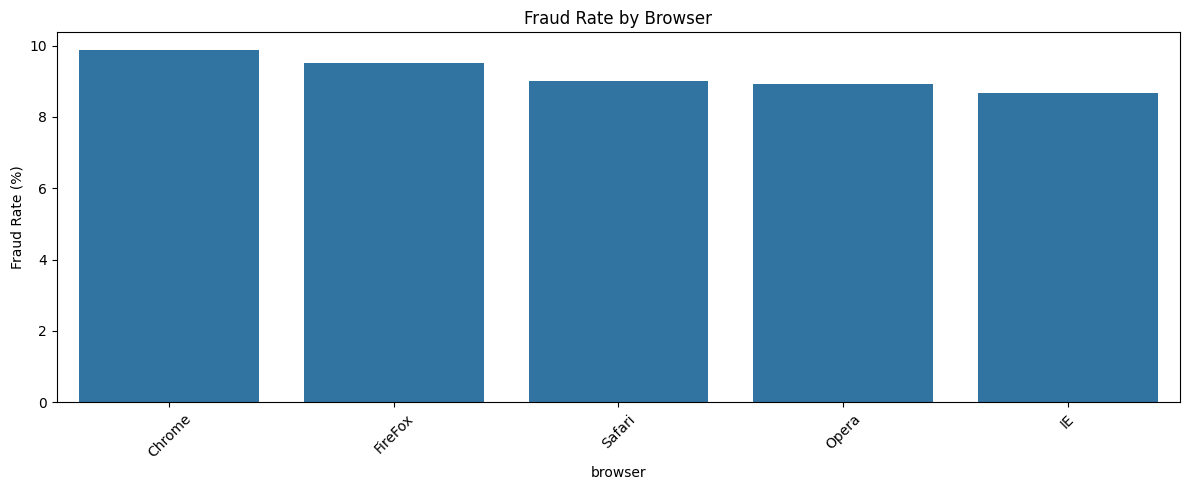

In [35]:
# 1. Browser Distribution
plt.figure(figsize=(12, 5))

# Calculate percentages
browser_dist = (fraud_df.groupby(['browser', 'class']).size() / len(fraud_df) * 100).reset_index(name='percentage')

# Plot
sns.barplot(x='browser', y='percentage', hue='class', data=browser_dist)
plt.title('Browser Usage by Transaction Class')
plt.ylabel('Percentage of Total Transactions')
plt.legend(title='Class', labels=['Legitimate', 'Fraud'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Browser Risk Analysis (Fraud Rate by Browser)
browser_risk = fraud_df.groupby('browser')['class'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(12, 5))
sns.barplot(x=browser_risk.index, y=browser_risk.values)
plt.title('Fraud Rate by Browser')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Source Analysis


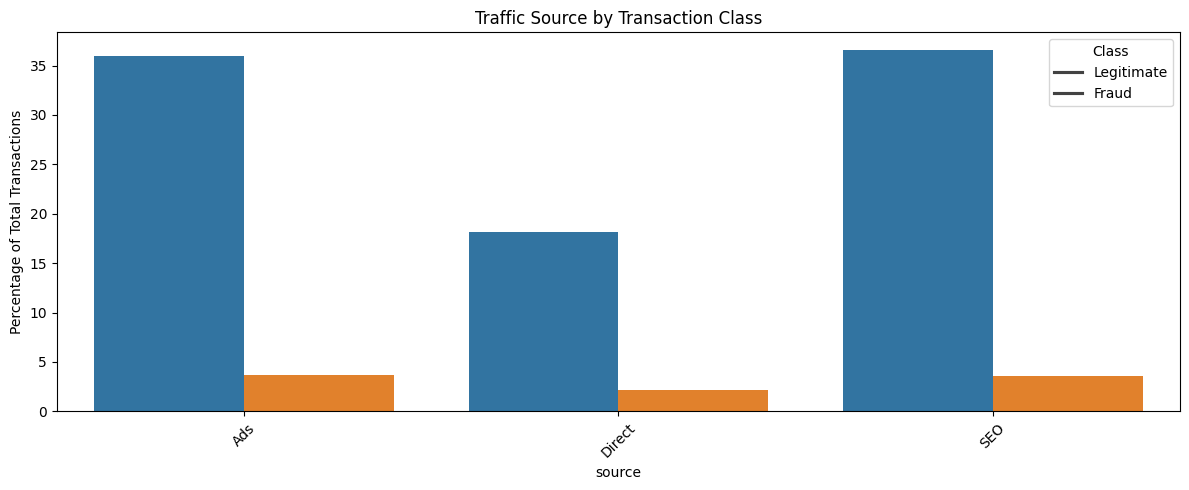

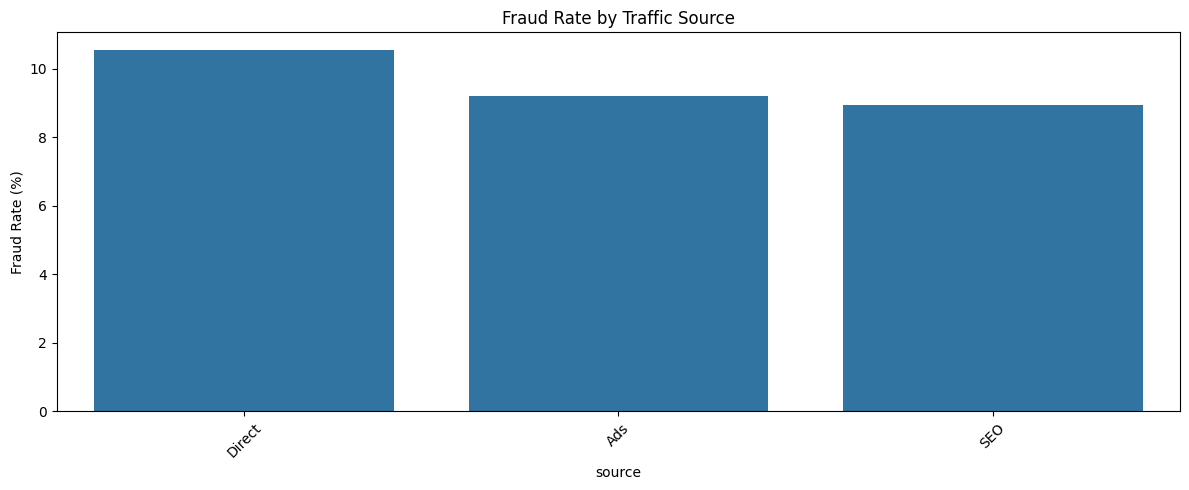

In [36]:
# 1. Source Distribution
plt.figure(figsize=(12, 5))

# Calculate percentages
source_dist = (fraud_df.groupby(['source', 'class']).size() / len(fraud_df) * 100).reset_index(name='percentage')

# Plot
sns.barplot(x='source', y='percentage', hue='class', data=source_dist)
plt.title('Traffic Source by Transaction Class')
plt.ylabel('Percentage of Total Transactions')
plt.legend(title='Class', labels=['Legitimate', 'Fraud'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Source Risk Analysis (Fraud Rate by Source)
source_risk = fraud_df.groupby('source')['class'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(12, 5))
sns.barplot(x=source_risk.index, y=source_risk.values)
plt.title('Fraud Rate by Traffic Source')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Gender Analysis


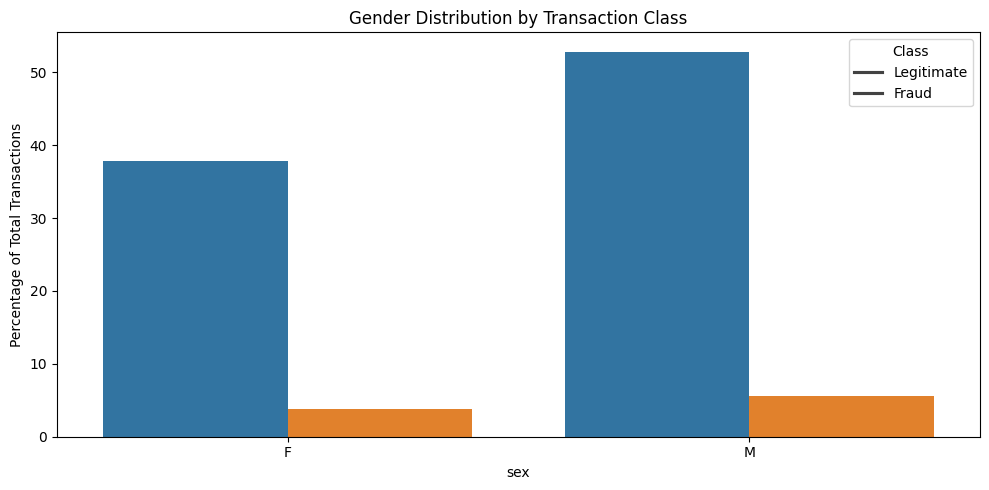

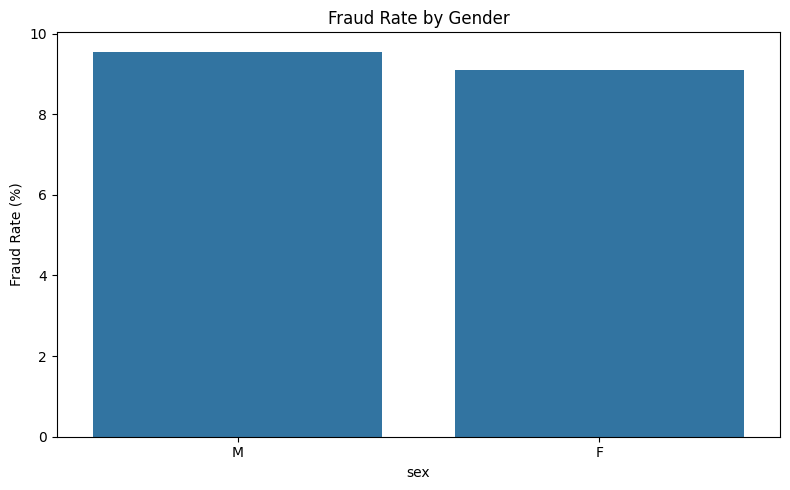

In [37]:
# 1. Gender Distribution
plt.figure(figsize=(10, 5))

# Calculate percentages
gender_dist = (fraud_df.groupby(['sex', 'class']).size() / len(fraud_df) * 100).reset_index(name='percentage')

# Plot
sns.barplot(x='sex', y='percentage', hue='class', data=gender_dist)
plt.title('Gender Distribution by Transaction Class')
plt.ylabel('Percentage of Total Transactions')
plt.legend(title='Class', labels=['Legitimate', 'Fraud'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Gender Risk Analysis (Fraud Rate by Gender)
gender_risk = fraud_df.groupby('sex')['class'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=gender_risk.index, y=gender_risk.values)
plt.title('Fraud Rate by Gender')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()